In [ ]:
# Smartphone Usage, Sleep & Productivity – Exploratory Data Analysis 

In [ ]:
# Load Data Set

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Smartphone_Usage_Productivity_Dataset.csv")
df.head()

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
0,U1,58,Male,Professional,Android,1.3,6.7,6,8.8,4,42,1,8.7
1,U2,25,Male,Professional,Android,1.2,1.5,5,6.4,1,51,3,5.1
2,U3,19,Male,Student,iOS,5.3,5.7,5,9.0,4,14,5,6.3
3,U4,35,Female,Business Owner,iOS,5.8,2.5,2,5.7,3,36,6,12.8
4,U5,33,Male,Freelancer,Android,7.9,1.3,4,5.7,3,37,5,9.9


In [ ]:
# Basic Data Understand

In [ ]:
# Dataset Shape

In [3]:
df.shape

(50000, 13)

In [ ]:
# Data Structure & Missing Value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    50000 non-null  object 
 1   Age                        50000 non-null  int64  
 2   Gender                     50000 non-null  object 
 3   Occupation                 50000 non-null  object 
 4   Device_Type                50000 non-null  object 
 5   Daily_Phone_Hours          50000 non-null  float64
 6   Social_Media_Hours         50000 non-null  float64
 7   Work_Productivity_Score    50000 non-null  int64  
 8   Sleep_Hours                50000 non-null  float64
 9   Stress_Level               50000 non-null  int64  
 10  App_Usage_Count            50000 non-null  int64  
 11  Caffeine_Intake_Cups       50000 non-null  int64  
 12  Weekend_Screen_Time_Hours  50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usag

In [ ]:
# Summary Statistics

In [17]:
df.describe()

,Age,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,39.034960,6.509116,4.267250,5.503760,6.497744,5.504500,32.43898,3.004580,8.006844
std,12.414877,3.170903,2.164743,2.874806,1.449551,2.871095,16.12151,1.996657,3.461300
min,18.000000,1.000000,0.500000,1.000000,4.000000,1.000000,5.00000,0.000000,2.000000
25%,28.000000,3.800000,2.400000,3.000000,5.200000,3.000000,18.00000,1.000000,5.000000
50%,39.000000,6.500000,4.300000,5.500000,6.500000,6.000000,32.00000,3.000000,8.000000
75%,50.000000,9.200000,6.100000,8.000000,7.800000,8.000000,46.00000,5.000000,11.000000
max,60.000000,12.000000,8.000000,10.000000,9.000000,10.000000,60.00000,6.000000,14.000000


In [ ]:
# Screen Time Analysis

In [ ]:
# Average Screen Time

In [11]:
df["Daily_Phone_Hours"].mean()

np.float64(6.509116000000001)

In [ ]:
# Screen Time Distribtion 

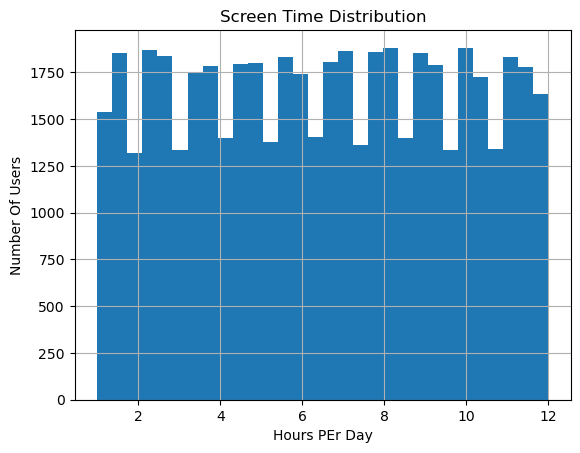

In [13]:
plt.figure()
df["Daily_Phone_Hours"].hist(bins=30)
plt.title("Screen Time Distribution")
plt.xlabel("Hours PEr Day")
plt.ylabel("Number Of Users")
plt.show()

In [ ]:
# Productivity Analysis

In [ ]:
# Productivity Distribution

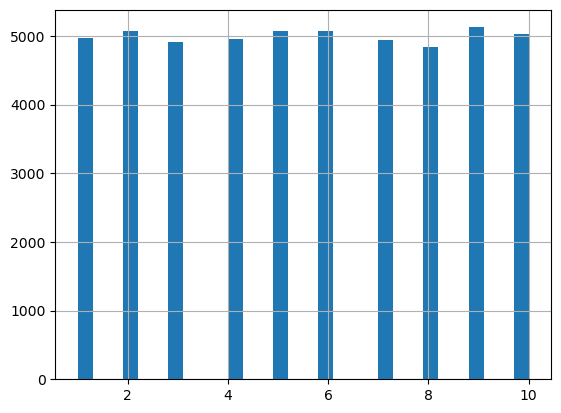

In [15]:
plt.figure()
df["Work_Productivity_Score"].hist(bins=30)
plt.show()

In [ ]:
# Correlation Between Screen Time & Productivity

In [18]:
df[["Daily_Phone_Hours", "Work_Productivity_Score"]].corr()

,Daily_Phone_Hours,Work_Productivity_Score
Daily_Phone_Hours,1.000000,-0.002404
Work_Productivity_Score,-0.002404,1.000000


In [ ]:
# Scatter Plot

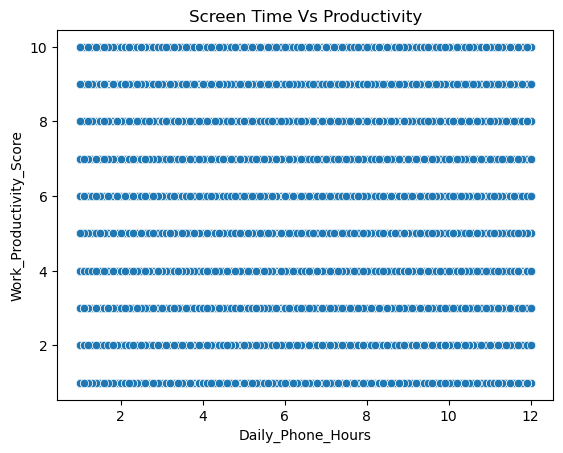

In [19]:
sns.scatterplot(x="Daily_Phone_Hours",y="Work_Productivity_Score",data=df)
plt.title("Screen Time Vs Productivity")
plt.show()

In [ ]:
# Create Usage Categories

In [ ]:
# Categorize Users

In [21]:
df["Usage_Category"]=pd.cut(
    df["Daily_Phone_Hours"],
    bins=[0,3,6,12],
    labels=["High","Moderate","Low"]
)

In [ ]:
# Productivity By Usage Category

In [22]:
df.groupby("Usage_Category")["Work_Productivity_Score"].mean()

C:\Users\Snigdha Chourasia\AppData\Local\Temp\ipykernel_17964\3721845213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Usage_Category")["Work_Productivity_Score"].mean()


Usage_Category
High        5.527271
Moderate    5.492927
Low         5.501085
Name: Work_Productivity_Score, dtype: float64

In [ ]:
# Bar Chart Comparison

C:\Users\Snigdha Chourasia\AppData\Local\Temp\ipykernel_17964\4226665101.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Usage_Category")["Work_Productivity_Score"].mean().plot(kind="bar")


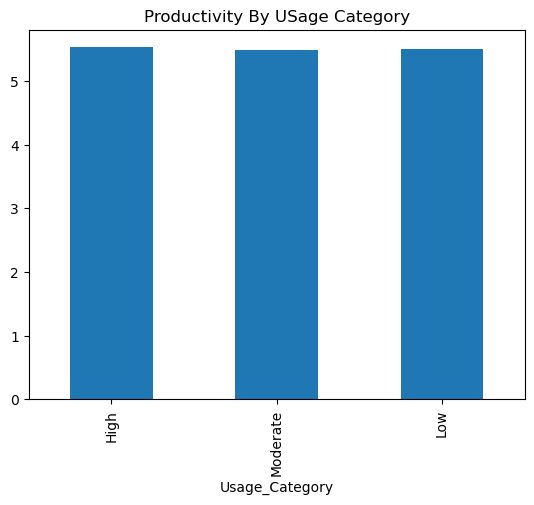

In [26]:
df.groupby("Usage_Category")["Work_Productivity_Score"].mean().plot(kind="bar")
plt.title("Productivity By USage Category")
plt.show()

In [ ]:
# Sleep Analysis

In [ ]:
# Sleep Distribution

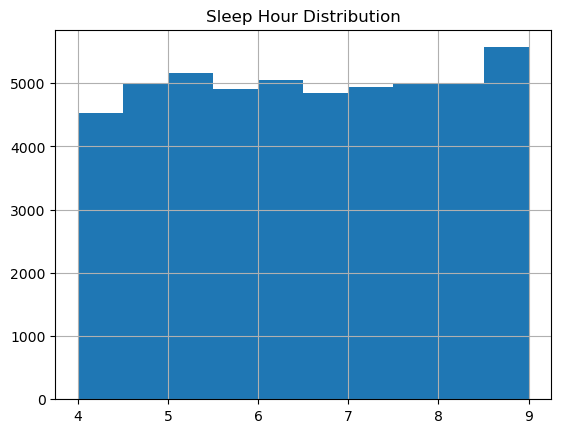

In [27]:
df["Sleep_Hours"].hist()
plt.title("Sleep Hour Distribution")
plt.show()

In [ ]:
# Screen Time vs Sleep

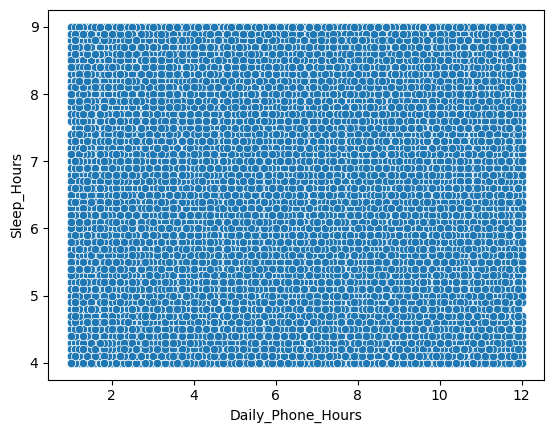

In [28]:
sns.scatterplot(x="Daily_Phone_Hours" , y="Sleep_Hours", data=df)
plt.show()

In [ ]:
# Sleep vs Productivity

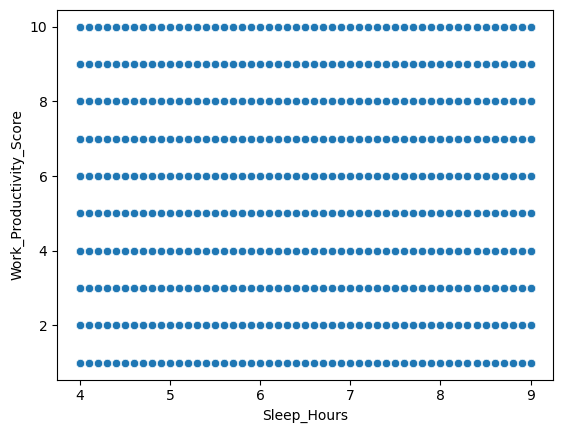

In [29]:
sns.scatterplot(x="Sleep_Hours",y="Work_Productivity_Score",data=df)
plt.show()

In [ ]:
# Notification Analysis

In [ ]:
# Notification Distribution

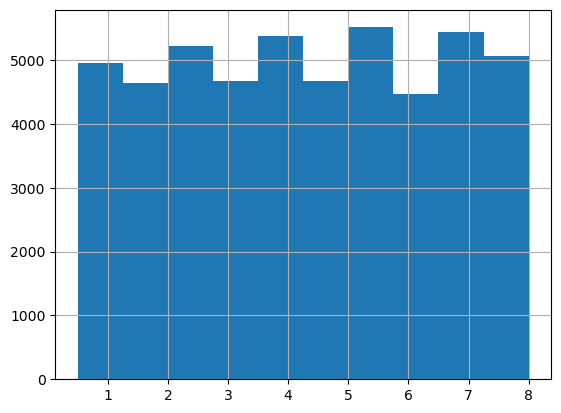

In [30]:
df["Social_Media_Hours"].hist()
plt.show()

In [ ]:
# Notifications vs Productivity

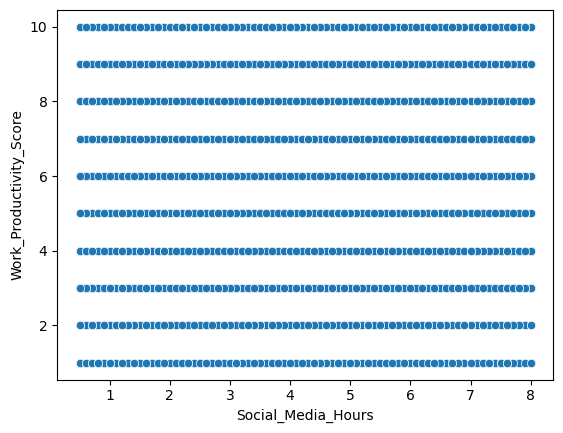

In [31]:
sns.scatterplot(x="Social_Media_Hours",y="Work_Productivity_Score",data=df)
plt.show()

In [ ]:
# App Category Analysis

In [ ]:
# Most Used App Categories

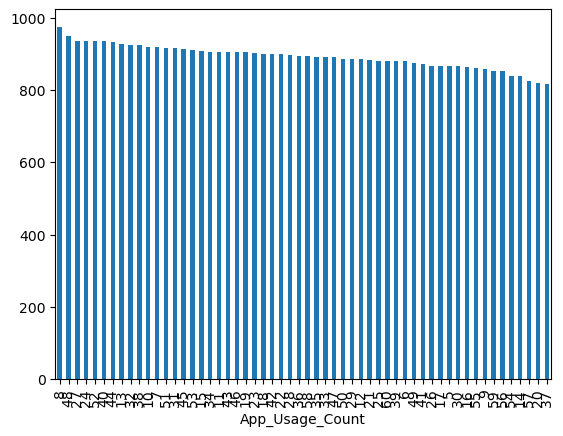

In [32]:
df["App_Usage_Count"].value_counts().plot(kind="bar")
plt.show()

In [ ]:
# Productivity by App Category

In [ ]:
# Correlation Heatmap

In [ ]:
# HeatMap

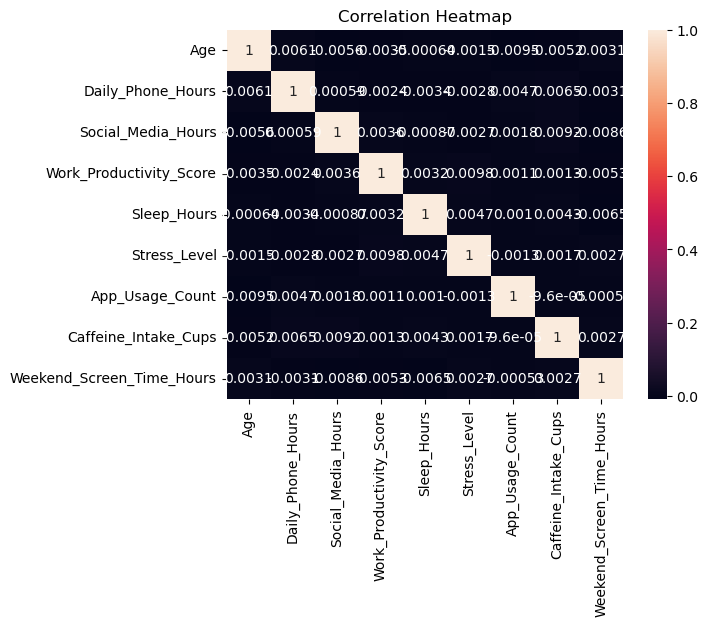

In [36]:
sns.heatmap(df.select_dtypes(include=["number"]).corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Segment Identification

In [ ]:
# High Productivity Low Usage Users

In [38]:
df[(df["Work_Productivity_Score"]>70) & (df["Daily_Phone_Hours"]<4)]

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours,Usage_Category


In [ ]:
# High Usage Low Productivity Users

In [39]:
df[(df["Work_Productivity_Score"]<70) & (df["Daily_Phone_Hours"]>4)]

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours,Usage_Category
2,U3,19,Male,Student,iOS,5.3,5.7,5,9.0,4,14,5,6.3,Moderate
3,U4,35,Female,Business Owner,iOS,5.8,2.5,2,5.7,3,36,6,12.8,Moderate
4,U5,33,Male,Freelancer,Android,7.9,1.3,4,5.7,3,37,5,9.9,Low
5,U6,32,Female,Student,Android,10.9,4.2,9,6.3,7,34,5,3.6,Low
6,U7,26,Male,Student,iOS,5.6,6.1,8,6.7,3,5,3,2.9,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,U49993,34,Male,Professional,iOS,10.1,4.1,3,7.3,8,36,3,5.7,Low
49994,U49995,34,Male,Student,Android,4.6,7.0,4,4.4,3,44,3,7.4,Moderate
49995,U49996,44,Male,Business Owner,Android,5.9,5.4,5,6.6,1,11,5,3.0,Moderate
49998,U49999,41,Female,Business Owner,iOS,8.9,3.0,6,5.5,2,51,0,9.2,Low


In [ ]:
df["Daily_Phone_Users"]=df["Daily_Phone_Users"].astype(int)